#Aula 12/09

**Busca Tabu**

**Marcelo Henrique Isidoro**

**19.2.8030**

Exercício 1:

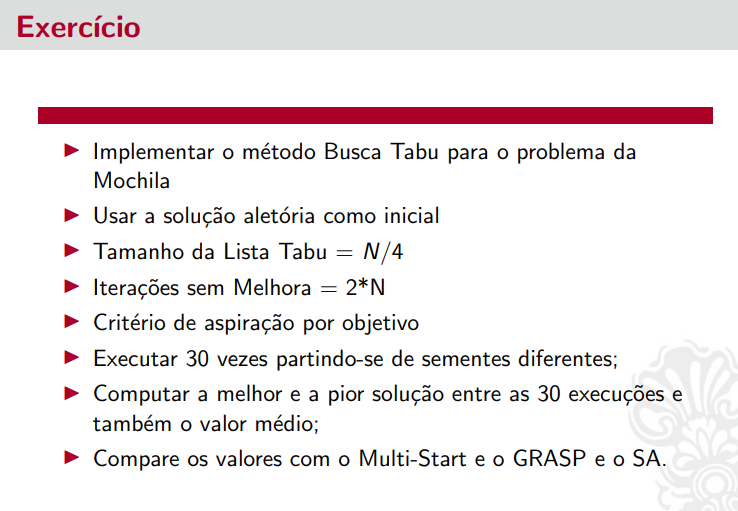

In [ ]:
lista = [0,2,4,6,8]

def verifica(lista, elemento):
  flag = 0
  for i in range(len(lista)):
    if (elemento == lista[i]):
      print('Está')
      flag = 1
  if (flag == 0):
    print('Não está')

verifica(lista, 4)

for i in range(3):
  lista.pop(0)

verifica(lista, 4)

lista.append(5)

verifica(lista, 5)

Está
Não está
Está


#Busca Tabu para o problema de Alocação de Tarefas

In [ ]:

import math
import random
import numpy as np
inf = math.inf

def calcula_fo(sol, tempos, n):
  fo = 0
  for i in range(1, n):
    col = sol[i-1]
    lin = sol[i]
    #print('Tarefa', lin,'depois da ', col)
    fo = fo + tempos[lin][col]
  return fo

def gera_sol(sol, n):
  v = []
  for i in range(1, n):
    v.append(i)
  #print(v)
  v = np.random.permutation(v)
  #print(v)
  for i in range(1, n):
    sol[i] = v[i-1]
  return sol

def melhor_vizinho(sol, tempos, n, lista, fo_star, iter):
  melhor = math.inf
  bi = 0
  bj = 0
  for i in range(1, n-1):
    for j in range(i+1, n):
      #troca
      aux = sol[i]
      sol[i] = sol[j]
      sol[j] = aux
      f = calcula_fo(sol, tempos, n)
      #destroca
      aux = sol[i]
      sol[i] = sol[j]
      sol[j] = aux
      if f < melhor and lista[i][j] < iter and lista[j][i] < iter or f < fo_star:
        melhor = f
        bi = i
        bj = j
  return melhor, bi, bj

def busca_local(sol, tempos, n, lista, sol_star, fo_star, BTmax, Tlista):
  fo = fo_star
  #print('Solução inicial = ', fo)
  iter = 0
  melhor_iter = 0
  while iter - melhor_iter < BTmax:
    iter = iter +1
    fo, i, j = melhor_vizinho(sol, tempos, n, lista, fo_star, iter)
    #print('Iteração', iter)
    #print('Função Objetivo', fo)
    aux = sol[i]
    sol[i] = sol[j]
    sol[j] = aux
    #Atualiza Lista Tabu
    lista[i][j] = iter + Tlista
    lista[j][i] = iter + Tlista
    if fo < fo_star:
      melhor_iter = iter
      fo_star = fo
      #print('Melhorou na iter', iter)
      #print('Melhor fo', fo_star)
      for i in range(n):
        sol_star[i] = sol[i]
  return sol_star, fo_star



n = 7
tempos =  [
           [inf, inf, inf, inf, inf, inf, inf],
           [5, inf, 3, 9, 4, 2, 6],
           [3, 3, inf, 6, 2, 3, 5],
           [4, 9, 6, inf, 7, 2, 6],
           [7, 4, 2, 7, inf, 4, 8],
           [2, 2, 3, 3, 4, inf, 1],
           [1, 6, 5, 5, 8, 1, inf]
           ]
#Parametros
BTmax = 2*n
Tlista = int(n/2)


experimentos = 30


for e in range(experimentos):
  random.seed(e+1)
  lista = []
  for i in range(n):
    v = n*[0]
    lista.append(v)
  sol = n*[0]
  sol_star = n*[0]
  sol = gera_sol(sol, n)
  fo_star = calcula_fo(sol, tempos, n)
  for i in range(n):
    sol_star[i] = sol[i]

  #print(sol)
  sol_star, fo_star = busca_local(sol, tempos, n, lista, sol_star, fo_star, BTmax, Tlista)
  print(sol_star)
  print('Experimento =', e+1, 'Solução final =', fo_star)
  #print(lista)

[0, 6, 5, 3, 2, 4, 1]
Experimento = 1 Solução final = 16
[0, 6, 2, 4, 1, 5, 3]
Experimento = 2 Solução final = 16
[0, 6, 5, 1, 2, 4, 3]
Experimento = 3 Solução final = 16
[0, 6, 5, 1, 2, 4, 3]
Experimento = 4 Solução final = 16
[0, 6, 5, 1, 2, 4, 3]
Experimento = 5 Solução final = 16
[0, 6, 5, 3, 2, 4, 1]
Experimento = 6 Solução final = 16
[0, 6, 2, 4, 1, 5, 3]
Experimento = 7 Solução final = 16
[0, 6, 5, 1, 2, 4, 3]
Experimento = 8 Solução final = 16
[0, 6, 5, 3, 4, 2, 1]
Experimento = 9 Solução final = 16
[0, 6, 2, 4, 1, 5, 3]
Experimento = 10 Solução final = 16
[0, 6, 2, 4, 1, 5, 3]
Experimento = 11 Solução final = 16
[0, 6, 5, 3, 4, 2, 1]
Experimento = 12 Solução final = 16
[0, 6, 2, 4, 1, 5, 3]
Experimento = 13 Solução final = 16
[0, 6, 2, 4, 1, 5, 3]
Experimento = 14 Solução final = 16
[0, 6, 5, 1, 2, 4, 3]
Experimento = 15 Solução final = 16
[0, 6, 5, 1, 2, 4, 3]
Experimento = 16 Solução final = 16
[0, 6, 5, 3, 4, 2, 1]
Experimento = 17 Solução final = 16
[0, 6, 2, 4, 1, 5, 3]
E

#Busca Tabu para o problema da Mochila


In [ ]:
import math
import random
import numpy as np

def busca_local(s, b, p, n, pena, lista, fo_star, peso_star, BTmax, Tlista):

  fo = fo_star
  iter = 1
  melhor_iter = 0
  peso = peso_star
  while iter - melhor_iter < BTmax:
    iter = iter + 1
    melhor, bi, peso_sol = melhor_vizinho(s, b, p, n, pena, lista, fo_star, peso_star, iter)

    lista[bi] = iter + Tlista

    if melhor > fo:
      s[bi] = 1 - s[bi]
      fo = melhor
      melhor_iter = iter
      peso = peso_sol
  return s, fo, peso

def melhor_vizinho(s, b, p, n, pena, lista, fo_star, peso_star, iter):

  melhor_peso = peso_star
  melhor = -math.inf
  for i in range(n):
    s[i] = 1 - s[i] #Troca o bit
    f , peso_sol = calcula_fo(b, p, s, n, cap, pena)
    #print(f)
    s[i] = 1 - s[i] #destroca
    if f > melhor and lista[i] < iter or f > fo_star:
      melhor = f
      bi = i
      melhor_peso = peso_sol
  return melhor, bi, melhor_peso


def random_init(N):
  # retorna uma solução aleatória para o problema da mochila
  x  = np.random.randint(2,size = N)
  return x

def calcula_fo(b, p, s, n, cap, pena):
  fo = 0
  pt = 0
  for i in range(n):
    fo = fo + s[i]*b[i]
    pt = pt + s[i]*p[i]
  if pt > cap:
    #print('Solução inviável')
    fo = fo -pena*(pt - cap)
  return fo, pt

#DADOS DO PROBLEMA-------------------#
n = 8 #Quantidade de objetos
beneficio = [4, 3, 2, 6, 2, 3, 5, 4]
peso =      [5, 4, 3, 9, 4, 2, 6, 7]
cap = 20 #Capacidade da mochila
#------------------------------------#
#PARÂMETROS--------------------------#
penalidade = 20  #Penalidade por solução inviável
BTmax = 1000
Tlista = int(n/2)
experimentos = 30
#------------------------------------#

for e in range(experimentos):
  random.seed(e+1)
  peso_star = 0
  lista = n*[0]
  sol = n*[0]
  sol_star = n*[0]
  sol = random_init(n)
  fo_star , peso_star = calcula_fo(beneficio, peso, sol, n, cap, penalidade)
  for i in range(n):
    sol_star[i] = sol[i]

  #print(sol)
  sol_star, fo_star, peso_star = busca_local(sol, beneficio, peso, n, penalidade, lista, fo_star, peso_star, BTmax, Tlista)
  print(sol_star)
  print('Peso', peso_star)
  print('Experimento =', e+1, 'Solução final =', fo_star)
  #print(lista)


[0 1 0 0 0 1 1 1]
Peso 19
Experimento = 1 Solução final = 15
[1 0 1 0 1 1 1 0]
Peso 20
Experimento = 2 Solução final = 16
[1 1 0 1 0 1 0 0]
Peso 20
Experimento = 3 Solução final = 16
[0 1 0 1 0 0 0 1]
Peso 20
Experimento = 4 Solução final = 13
[1 0 1 1 0 1 0 0]
Peso 19
Experimento = 5 Solução final = 15
[0 0 1 0 0 0 1 1]
Peso 16
Experimento = 6 Solução final = 11
[1 1 1 1 0 0 0 0]
Peso 21
Experimento = 7 Solução final = -5
[1 0 1 1 1 0 0 0]
Peso 21
Experimento = 8 Solução final = -6
[0 0 1 1 0 0 0 1]
Peso 19
Experimento = 9 Solução final = 12
[0 1 1 0 1 1 0 1]
Peso 20
Experimento = 10 Solução final = 14
[1 0 0 1 0 0 1 0]
Peso 20
Experimento = 11 Solução final = 15
[0 1 1 0 1 1 1 0]
Peso 19
Experimento = 12 Solução final = 15
[0 1 0 0 0 1 1 1]
Peso 19
Experimento = 13 Solução final = 15
[1 1 1 1 0 1 0 0]
Peso 23
Experimento = 14 Solução final = -42
[1 1 0 1 0 1 0 0]
Peso 20
Experimento = 15 Solução final = 16
[1 1 1 0 1 1 0 0]
Peso 18
Experimento = 16 Solução final = 14
[1 1 0 0 1 1 0 0